# 基本信息
1. 实验名称：网络优化实验
2. 姓名：戴斌斌
3. 学号：20281239
4. 日期：2022/11/14

---

# 一、任务1-在多分类任务实验中手动实现dropout

## 1.1 任务内容

1. 任务具体要求  
在多分类任务实验中分别手动实现dropout  
探究不同丢弃率对实验结果的影响（可用loss曲线进行展示）
2. 任务目的  
探究不同丢弃率对实验结果的影响
3. 任务算法或原理介绍    
Dropout 原理   
![](https://drailife.oss-cn-beijing.aliyuncs.com/img/202211112255396.png)
4. 任务所用数据集   
   MNIST手写体数据集:  
     + 该数据集包含60,000个用于训练的图像样本和10,000个用于测试的图像样本。  
     + 图像是固定大小(28x28像素)，其值为0到1。为每个图像都被平展并转换为784  
        
## 1.2 任务思路及代码  

1. 构建数据集
2. 构建前馈神经网络，损失函数，优化函数
3. 手动实现dropout
3. 使用网络预测结果，得到损失值  
4. 进行反向传播，和梯度更新  
5. 对loss、acc等指标进行分析

### 1.2.0数据集定义

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torch.nn.functional import cross_entropy, binary_cross_entropy
from torch.nn import CrossEntropyLoss
from torchvision import transforms
from sklearn import  metrics
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 如果有gpu则在gpu上计算 加快计算速度
print(f'当前使用的device为{device}')
# 数据集定义
# 定义多分类数据集 - train_dataloader - test_dataloader
batch_size = 128
# Build the training and testing dataset
traindataset3 = torchvision.datasets.FashionMNIST(root='E:\\DataSet\\FashionMNIST\\Train',
                                                  train=True,
                                                  download=True,
                                                  transform=transforms.ToTensor())
testdataset3 = torchvision.datasets.FashionMNIST(root='E:\\DataSet\\FashionMNIST\\Test',
                                                 train=False,
                                                 download=True,
                                                 transform=transforms.ToTensor())
traindataloader3 = torch.utils.data.DataLoader(traindataset3, batch_size=batch_size, shuffle=True)
testdataloader3 = torch.utils.data.DataLoader(testdataset3, batch_size=batch_size, shuffle=False)
# 绘制图像的代码
def picture(name, trainl, testl, type='Loss'):
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
    plt.title(name) # 命名
    plt.plot(trainl, c='g', label='Train '+ type)
    plt.plot(testl, c='r', label='Test '+type)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
print(f'多分类数据集 样本总数量{len(traindataset3) + len(testdataset3)},训练样本数量{len(traindataset3)},测试样本数量{len(testdataset3)}')

当前使用的device为cuda
多分类数据集 样本总数量70000,训练样本数量60000,测试样本数量10000


### 1.2.1 手动实现前馈网络-回归任务  



### 1.2.2 手动前馈网络-二分类任务  


### 1.2.3 手动实现前馈神经网络-多分类  


## 1.3 实验结果分析  
将上述前馈网络回归任务每一轮得训练和测试得损失值绘制成图表，如下图：

将上述的二分类和多分类的正确率绘制成表格

---

### 2.2.1 torch.nn实现前馈神经网络-回归任务

In [13]:
from torch.optim import SGD
from torch.nn import MSELoss
# 利用torch.nn实现前馈神经网络-回归任务 代码
# 定义自己的前馈神经网络
class MyNet21(nn.Module):
    def __init__(self):
        super(MyNet21, self).__init__()
        # 设置隐藏层和输出层的节点数
        num_inputs, num_hiddens, num_outputs = 500, 256, 1
        # 定义模型结构
        self.input_layer = nn.Flatten()
        self.hidden_layer = nn.Linear(num_inputs, num_hiddens)
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        self.relu = nn.ReLU()

    # 定义前向传播
    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

# 训练
model21 = MyNet21()  # logistics模型
model21 = model21.to(device)
print(model21)
criterion = MSELoss()  # 损失函数
criterion = criterion.to(device)
optimizer = SGD(model21.parameters(), lr=0.1)  # 优化函数
epochs = 40  # 训练轮数
train_all_loss21 = []  # 记录训练集上得loss变化
test_all_loss21 = []  # 记录测试集上的loss变化
begintime21 = time.time()
for epoch in range(epochs):
    train_l = 0
    for data, labels in traindataloader1:
        data, labels = data.to(device=device), labels.to(device)
        pred = model21(data)
        train_each_loss = criterion(pred.view(-1, 1), labels.view(-1, 1))  # 计算每次的损失值
        optimizer.zero_grad()  # 梯度清零
        train_each_loss.backward()  # 反向传播
        optimizer.step()  # 梯度更新
        train_l += train_each_loss.item()
    train_all_loss21.append(train_l)  # 添加损失值到列表中
    with torch.no_grad():
        test_loss = 0
        for data, labels in testdataloader1:
            data, labels = data.to(device), labels.to(device)
            pred = model21(data)
            test_each_loss = criterion(pred,labels)
            test_loss += test_each_loss.item()
        test_all_loss21.append(test_loss)
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('epoch: %d | train loss:%.5f | test loss:%.5f' % (epoch + 1, train_all_loss21[-1], test_all_loss21[-1]))
endtime21 = time.time()
print("torch.nn实现前馈网络-回归实验 %d轮 总用时: %.3fs" % (epochs, endtime21 - begintime21))

MyNet21(
  (input_layer): Flatten(start_dim=1, end_dim=-1)
  (hidden_layer): Linear(in_features=500, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 1 | train loss:179.20287 | test loss:0.46446
epoch: 10 | train loss:0.26332 | test loss:0.16052
epoch: 20 | train loss:0.16424 | test loss:0.14287
epoch: 30 | train loss:0.11388 | test loss:0.13307
epoch: 40 | train loss:0.08121 | test loss:0.13289
torch.nn实现前馈网络-回归实验 40轮 总用时: 6.538s


### 2.2.2 torch.nn实现前馈神经网络-二分类

In [14]:
# 利用torch.nn实现前馈神经网络-二分类任务
import time
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy
# 利用torch.nn实现前馈神经网络-回归任务 代码
# 定义自己的前馈神经网络
class MyNet22(nn.Module):
    def __init__(self):
        super(MyNet22, self).__init__()
        # 设置隐藏层和输出层的节点数
        num_inputs, num_hiddens, num_outputs = 200, 256, 1
        # 定义模型结构
        self.input_layer = nn.Flatten()
        self.hidden_layer = nn.Linear(num_inputs, num_hiddens)
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        self.relu = nn.ReLU()

    def logistic(self, x):  # 定义logistic函数
        x = 1.0 / (1.0 + torch.exp(-x))
        return x
    # 定义前向传播
    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(self.hidden_layer(x))
        x = self.logistic(self.output_layer(x))
        return x

# 训练
model22 = MyNet22()  # logistics模型
model22 = model22.to(device)
print(model22)
optimizer = SGD(model22.parameters(), lr=0.001)  # 优化函数
epochs = 40  # 训练轮数
train_all_loss22 = []  # 记录训练集上得loss变化
test_all_loss22 = []  # 记录测试集上的loss变化
train_ACC22, test_ACC22 = [], []
begintime22 = time.time()
for epoch in range(epochs):
    train_l, train_epoch_count, test_epoch_count = 0, 0, 0 # 每一轮的训练损失值 训练集正确个数 测试集正确个数
    for data, labels in traindataloader2:
        data, labels = data.to(device), labels.to(device)
        pred = model22(data)
        train_each_loss = binary_cross_entropy(pred.view(-1), labels.view(-1))  # 计算每次的损失值
        optimizer.zero_grad()  # 梯度清零
        train_each_loss.backward()  # 反向传播
        optimizer.step()  # 梯度更新
        train_l += train_each_loss.item()
        pred = torch.tensor(np.where(pred.cpu()>0.5, 1, 0))  # 大于 0.5时候，预测标签为 1 否则为0
        each_count = (pred.view(-1) == labels.cpu()).sum() # 每一个batchsize的正确个数
        train_epoch_count += each_count # 计算每个epoch上的正确个数
    train_ACC22.append(train_epoch_count / len(traindataset2))
    train_all_loss22.append(train_l)  # 添加损失值到列表中
    with torch.no_grad():
        test_loss, each_count = 0, 0
        for data, labels in testdataloader2:
            data, labels = data.to(device), labels.to(device)
            pred = model22(data)
            test_each_loss = binary_cross_entropy(pred.view(-1),labels)
            test_loss += test_each_loss.item()
            # .cpu 为转换到cpu上计算
            pred = torch.tensor(np.where(pred.cpu() > 0.5, 1, 0))
            each_count = (pred.view(-1)==labels.cpu().view(-1)).sum()
            test_epoch_count += each_count
        test_all_loss22.append(test_loss)
        test_ACC22.append(test_epoch_count / len(testdataset2))
    if epoch == 0 or (epoch + 1) % 4 == 0:
        print('epoch: %d | train loss:%.5f test loss:%.5f | train acc:%.5f | test acc:%.5f' % (epoch + 1, train_all_loss22[-1], 
                                                                                               test_all_loss22[-1], train_ACC22[-1], test_ACC22[-1]))

endtime22 = time.time()
print("torch.nn实现前馈网络-二分类实验 %d轮 总用时: %.3fs" % (epochs, endtime22 - begintime22))

MyNet22(
  (input_layer): Flatten(start_dim=1, end_dim=-1)
  (hidden_layer): Linear(in_features=200, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 1 | train loss:79.07320 test loss:32.92679 | train acc:0.47936 | test acc:0.51533
epoch: 4 | train loss:67.24074 test loss:28.13028 | train acc:0.71221 | test acc:0.73583
epoch: 8 | train loss:56.03760 test loss:23.48878 | train acc:0.83114 | test acc:0.84050
epoch: 12 | train loss:47.73045 test loss:20.03178 | train acc:0.86971 | test acc:0.87617
epoch: 16 | train loss:41.48397 test loss:17.45700 | train acc:0.88629 | test acc:0.89017
epoch: 20 | train loss:36.86592 test loss:15.55864 | train acc:0.89643 | test acc:0.89600
epoch: 24 | train loss:33.54197 test loss:14.16518 | train acc:0.90271 | test acc:0.90067
epoch: 28 | train loss:31.02676 test loss:13.14387 | train acc:0.90700 | test acc:0.90467
epoch: 32 | train loss:29.09306 test loss:12.38178 | train acc:0.

### 2.2.3 torch.nn实现前馈神经网络-多分类任务

In [77]:
# 利用torch.nn实现前馈神经网络-多分类任务
from collections import OrderedDict
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
# 定义自己的前馈神经网络
class MyNet23(nn.Module):
    """
    参数：  num_input：输入每层神经元个数，为一个列表数据
            num_hiddens：隐藏层神经元个数
            num_outs： 输出层神经元个数
            num_hiddenlayer : 隐藏层的个数
    """
    def __init__(self,num_hiddenlayer=1, num_inputs=28*28,num_hiddens=[256],num_outs=10,act='relu'):
        super(MyNet23, self).__init__()
        # 设置隐藏层和输出层的节点数
        self.num_inputs, self.num_hiddens, self.num_outputs = num_inputs,num_hiddens,num_outs # 十分类问题

        # 定义模型结构
        self.input_layer = nn.Flatten()
        # 若只有一层隐藏层
        if num_hiddenlayer ==1:
            self.hidden_layers = nn.Linear(self.num_inputs,self.num_hiddens[-1])
        else: # 若有多个隐藏层
            self.hidden_layers = nn.Sequential()
            self.hidden_layers.add_module("hidden_layer1", nn.Linear(self.num_inputs,self.num_hiddens[0]))
            for i in range(0,num_hiddenlayer-1):
                name = str('hidden_layer'+str(i+2))
                self.hidden_layers.add_module(name, nn.Linear(self.num_hiddens[i],self.num_hiddens[i+1]))
        self.output_layer = nn.Linear(self.num_hiddens[-1], self.num_outputs)
        # 指代需要使用什么样子的激活函数
        if act == 'relu':
            self.act = nn.ReLU()
        elif act == 'sigmoid':
            self.act = nn.Sigmoid()
        elif act == 'tanh':
            self.act = nn.Tanh()
        elif act == 'elu':
            self.act = nn.ELU()
        print(f'你本次使用的激活函数为 {act}')

    def logistic(self, x):  # 定义logistic函数
        x = 1.0 / (1.0 + torch.exp(-x))
        return x
    # 定义前向传播
    def forward(self, x):
        x = self.input_layer(x)
        x = self.act(self.hidden_layers(x))
        x = self.output_layer(x)
        return x

# 训练
# 使用默认的参数即： num_inputs=28*28,num_hiddens=256,num_outs=10,act='relu'
model23 = MyNet23()  
model23 = model23.to(device)

# 将训练过程定义为一个函数，方便实验三和实验四调用
def train_and_test(model=model23):
    MyModel = model
    print(MyModel)
    optimizer = SGD(MyModel.parameters(), lr=0.01)  # 优化函数
    epochs = 40  # 训练轮数
    criterion = CrossEntropyLoss() # 损失函数
    train_all_loss23 = []  # 记录训练集上得loss变化
    test_all_loss23 = []  # 记录测试集上的loss变化
    train_ACC23, test_ACC23 = [], []
    begintime23 = time.time()
    for epoch in range(epochs):
        train_l, train_epoch_count, test_epoch_count = 0, 0, 0
        for data, labels in traindataloader3:
            data, labels = data.to(device), labels.to(device)
            pred = MyModel(data)
            train_each_loss = criterion(pred, labels.view(-1))  # 计算每次的损失值
            optimizer.zero_grad()  # 梯度清零
            train_each_loss.backward()  # 反向传播
            optimizer.step()  # 梯度更新
            train_l += train_each_loss.item()
            train_epoch_count += (pred.argmax(dim=1)==labels).sum()
        train_ACC23.append(train_epoch_count.cpu()/len(traindataset3))
        train_all_loss23.append(train_l)  # 添加损失值到列表中
        with torch.no_grad():
            test_loss, test_epoch_count= 0, 0
            for data, labels in testdataloader3:
                data, labels = data.to(device), labels.to(device)
                pred = MyModel(data)
                test_each_loss = criterion(pred,labels)
                test_loss += test_each_loss.item()
                test_epoch_count += (pred.argmax(dim=1)==labels).sum()
            test_all_loss23.append(test_loss)
            test_ACC23.append(test_epoch_count.cpu()/len(testdataset3))
        if epoch == 0 or (epoch + 1) % 4 == 0:
            print('epoch: %d | train loss:%.5f | test loss:%.5f | train acc:%5f test acc:%.5f:' % (epoch + 1, train_all_loss23[-1], test_all_loss23[-1],
                                                                                                                     train_ACC23[-1],test_ACC23[-1]))
    endtime23 = time.time()
    print("torch.nn实现前馈网络-多分类任务 %d轮 总用时: %.3fs" % (epochs, endtime23 - begintime23))
    # 返回训练集和测试集上的 损失值 与 准确率
    return train_all_loss23,test_all_loss23,train_ACC23,test_ACC23
train_all_loss23,test_all_loss23,train_ACC23,test_ACC23 = train_and_test(model=model23)

你本次使用的激活函数为 relu
MyNet23(
  (input_layer): Flatten(start_dim=1, end_dim=-1)
  (hidden_layers): Linear(in_features=784, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
  (act): ReLU()
)
epoch: 1 | train loss:657.80222 | test loss:74.67226 | train acc:0.617033 test acc:0.68250:
epoch: 4 | train loss:294.04037 | test loss:49.02613 | train acc:0.790417 test acc:0.78640:
epoch: 8 | train loss:240.90404 | test loss:42.03059 | train acc:0.825967 test acc:0.81290:
epoch: 12 | train loss:220.93427 | test loss:38.98449 | train acc:0.838167 test acc:0.82560:
epoch: 16 | train loss:209.56696 | test loss:37.69722 | train acc:0.846100 test acc:0.83220:
epoch: 20 | train loss:201.51846 | test loss:36.26622 | train acc:0.850833 test acc:0.83680:
epoch: 24 | train loss:195.08846 | test loss:35.30845 | train acc:0.856483 test acc:0.84050:
epoch: 28 | train loss:189.75432 | test loss:34.98433 | train acc:0.859967 test acc:0.84270:
epoch: 32 | train loss:

## 2.3 实验结果分析  
将上述前馈网络回归任务每一轮得训练和测试得损失值绘制成图表，如下图：

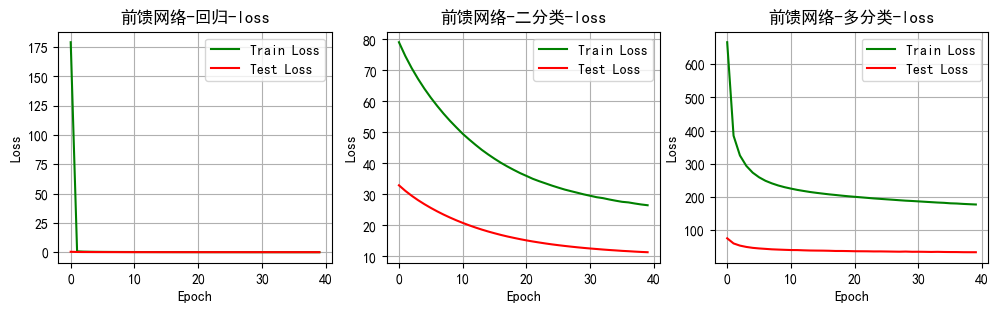

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(131)
picture('前馈网络-回归-loss',train_all_loss21,test_all_loss21)
plt.subplot(132)
picture('前馈网络-二分类-loss',train_all_loss22,test_all_loss22)
plt.subplot(133)
picture('前馈网络-多分类-loss',train_all_loss23,test_all_loss23)
plt.show()

将上述前馈网络回归任务每一轮得训练和测试得准确率值绘制成图表，如下图：

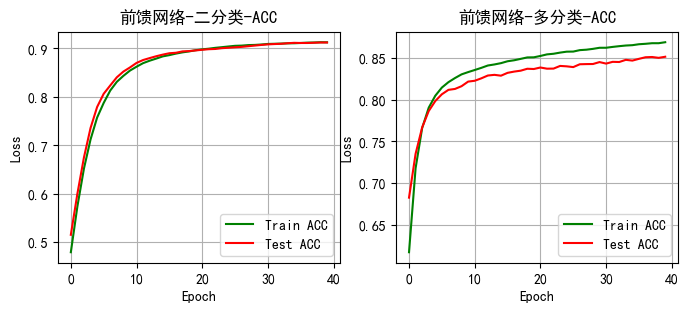

In [78]:
plt.figure(figsize=(8,3))
plt.subplot(121)
picture('前馈网络-二分类-ACC',train_ACC22,test_ACC22,type='ACC')
plt.subplot(122)
picture('前馈网络-多分类-ACC',train_ACC23,test_ACC23,type='ACC')
plt.show()

torch.nn实现的前馈网络在不同的数据集上表现出不同的效果，在回归问题中，损失函数下降速度极快，在前几轮就充分训练模型，并取得较好的效果。  
在二分类中，loss值稳步下降，准确率逐步提升。  
在多分类中，数据的规模较大，loss值在前6轮中下降较快，准确率提升较大，在后续的训练中，loss值相比前几轮下降较慢，准确率提升速度也不及前几轮。同时由于训练轮数的不足，模型并未没被完全训练好，可以通过增大epochs和lr来解决这个问题。

---

# A1 实验心得

学会手动构建前馈神经网络和利用torch.nn构建前馈神经网络解决回归、二分类、和多分类问题
1. 实验中发现学习率的设置至关重要，如果学习率过大则会导致准确率下降的趋势，若学习率过小会导致模型需要更多时间收敛
2. 实验过程中发现出现过拟合现象，通过修改相关参数得以纠正
3. 学会程序模块话的编写，避免重复编写代码
4. 对激活函数的选取有了更加清晰的认识
5. 隐藏层的个数和隐藏层的神经元个数对模型有着很大的影响。

# A2 参考文献  
参考课程PPT